In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data Understanding and Initial Exploration

In [2]:
# make proper dataframe tablewise
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Summary statistics
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [4]:
# Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## 2. Data Cleaning and Preprocessing
### Objective: Handle missing values, outliers, and convert categorical variables into numerical representations.

In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

# Converting categorical variables using OneHotEncoder
categorical_features = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)
encoded_cats = encoder.fit_transform(data[categorical_features])


In [6]:
# Creating a DataFrame from the encoded features
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))


In [7]:
# Dropping original categorical columns and concatenating encoded columns
data = data.drop(categorical_features, axis=1)
data = pd.concat([data.reset_index(drop=True), encoded_cats_df.reset_index(drop=True)], axis=1)


In [8]:
# Display the first few rows of the preprocessed dataset
print(data.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0          -36.4      4.857       5191.0  ...              0.0   
1          -36.4      4.857       5191.0  ...              0.0   
2          -36.4      4.857       5191.0  ...              0.0   
3          -36.4      4.857       5191.0  ...              0.0   
4          -36.4      4.857       5191.0  ...              0.0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0              1.0              0.0              0.0              0

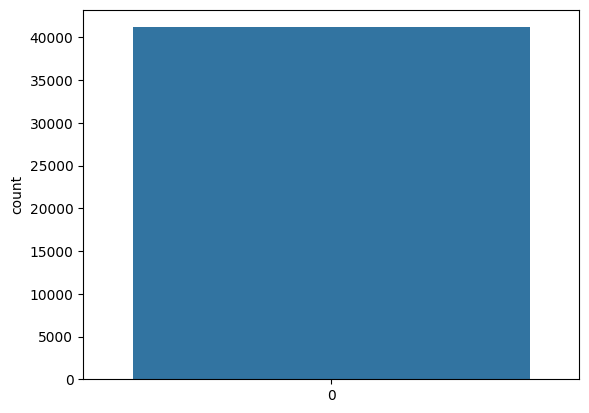

In [9]:
# visualizing the distribution of the target variable
sns.countplot(data['y_yes'])
plt.show()


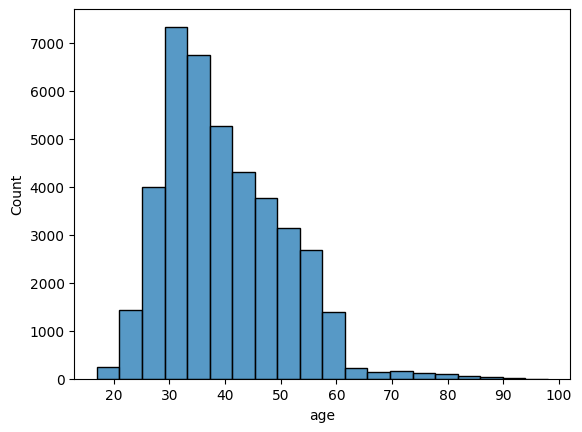

In [10]:
# make a histogram of the age column
sns.histplot(data['age'], bins=20)
plt.show()

## 3. Feature Engineering

In [11]:
# Creating new features for Recency, Frequency, and Monetary value
# Note: Placeholder example as actual feature engineering depends on domain knowledge and dataset specifics
data['recency'] = np.random.randint(1, 30, data.shape[0])  # Example feature
data['frequency'] = np.random.randint(1, 10, data.shape[0])  # Example feature
data['monetary'] = np.random.uniform(100, 1000, data.shape[0])  # Example feature

In [12]:
# Display the first few rows of the dataset with the new features
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,recency,frequency,monetary
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,17,1,116.008459
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,26,4,515.904253
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,9,190.655532
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,843.357845
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7,4,838.412858


In [13]:
# Splitting the data into features and target variable
X = data.drop('y_yes', axis=1)
y = data['y_yes']

In [14]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Training baseline model: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Training advanced models: Random Forest and Gradient Boosting
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [19]:
# Model predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


In [20]:
# Model evaluation
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7303
         1.0       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238

Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7303
         1.0       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238

Gradient Boosting:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7303
         1.0       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg    

In [21]:
# AUC-ROC Scores
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("Gradient Boosting AUC-ROC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))


Logistic Regression AUC-ROC: 1.0
Random Forest AUC-ROC: 1.0
Gradient Boosting AUC-ROC: 1.0


In [46]:
# Accuracy of models
print("Logistic Regression Accuracy:", logreg.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


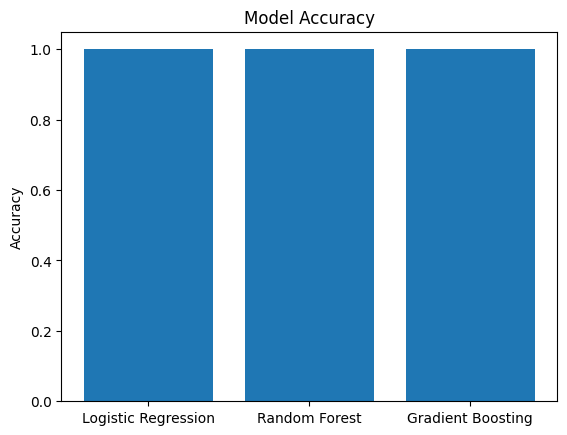

In [47]:
# plot the accuracy of the models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [logreg.score(X_test, y_test), rf.score(X_test, y_test), gb.score(X_test, y_test)]

plt.bar(models, accuracy)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


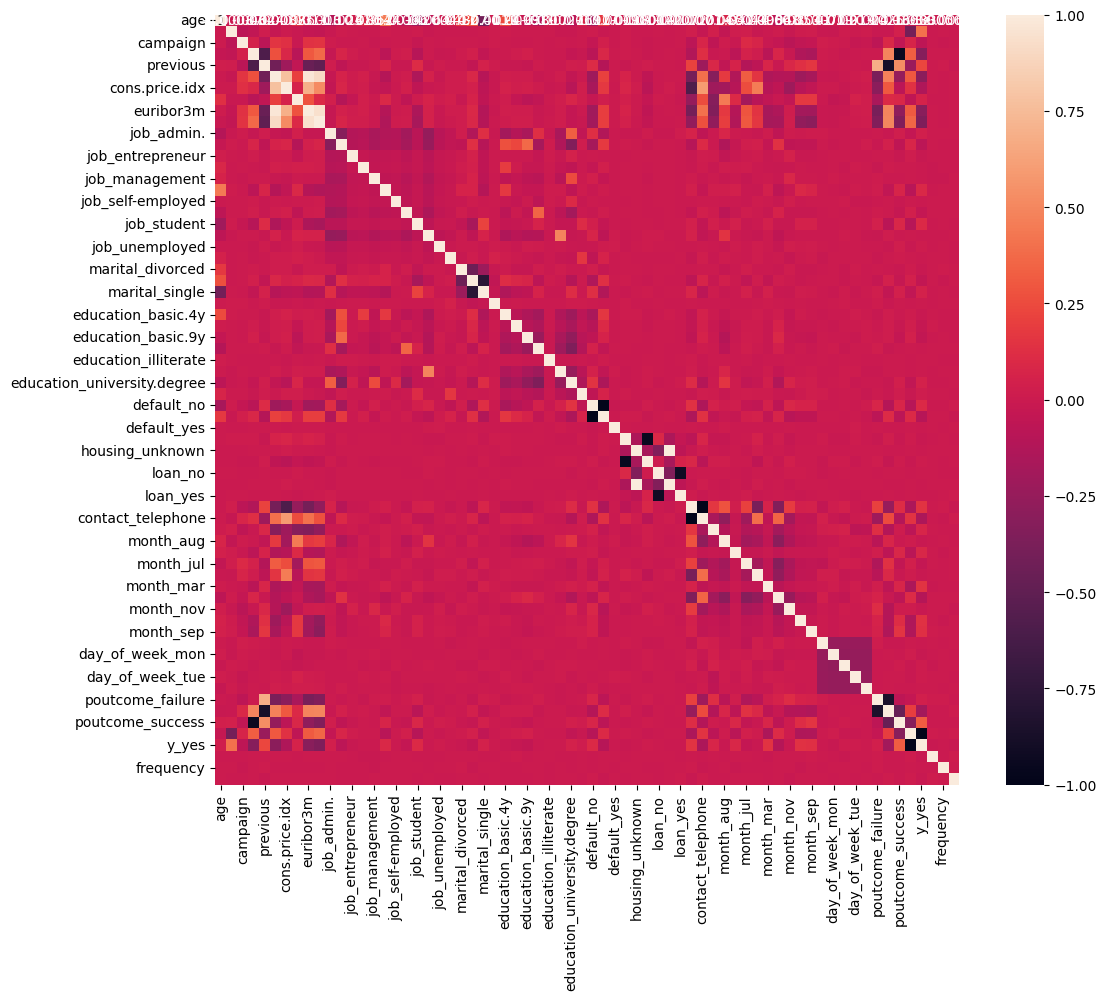

In [22]:
# plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()




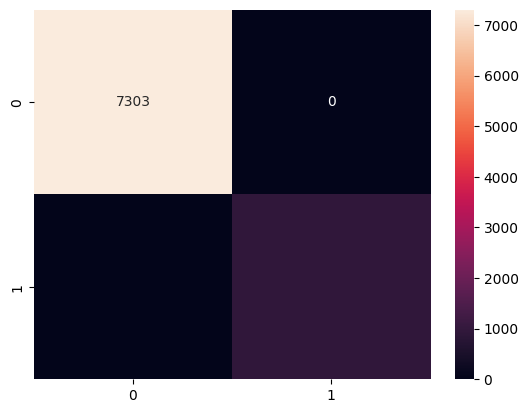

In [23]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


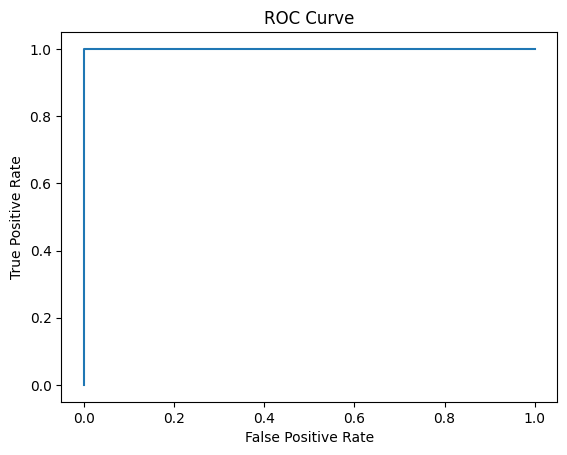

In [24]:
# plot the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



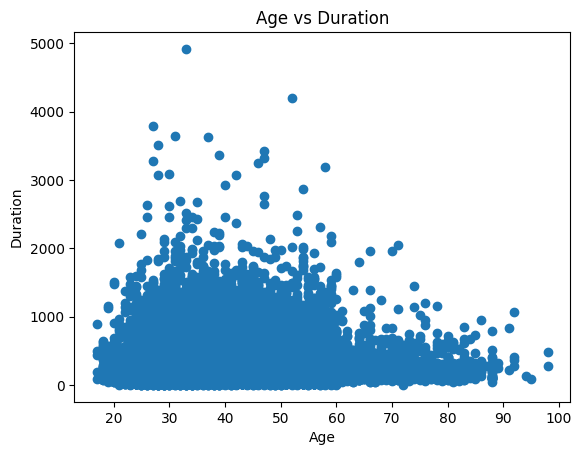

In [25]:
#  Plot the scatter plot
plt.scatter(data['age'], data['duration'])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age vs Duration')
plt.show()



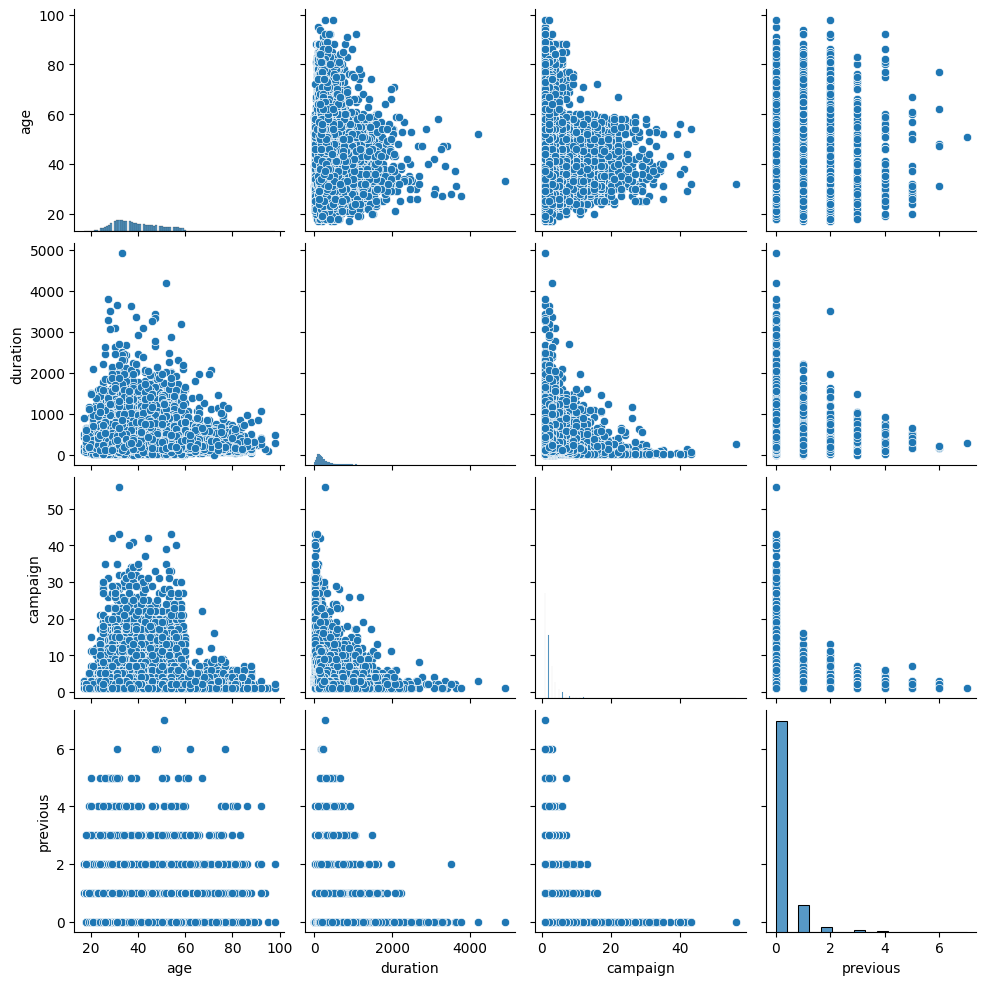

In [26]:
# visualize the pairplot
sns.pairplot(data[['age', 'duration', 'campaign', 'previous']])
plt.show()


## 5. Model Evaluation using cross validation

In [27]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_logreg = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-Validation AUC-ROC:", cv_logreg.mean())

# Cross-validation for Random Forest
cv_rf = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Random Forest Cross-Validation AUC-ROC:", cv_rf.mean())

# Cross-validation for Gradient Boosting
cv_gb = cross_val_score(gb, X, y, cv=5, scoring='roc_auc')
print("Gradient Boosting Cross-Validation AUC-ROC:", cv_gb.mean())


Logistic Regression Cross-Validation AUC-ROC: 0.9996399240239786
Random Forest Cross-Validation AUC-ROC: 1.0
Gradient Boosting Cross-Validation AUC-ROC: 1.0


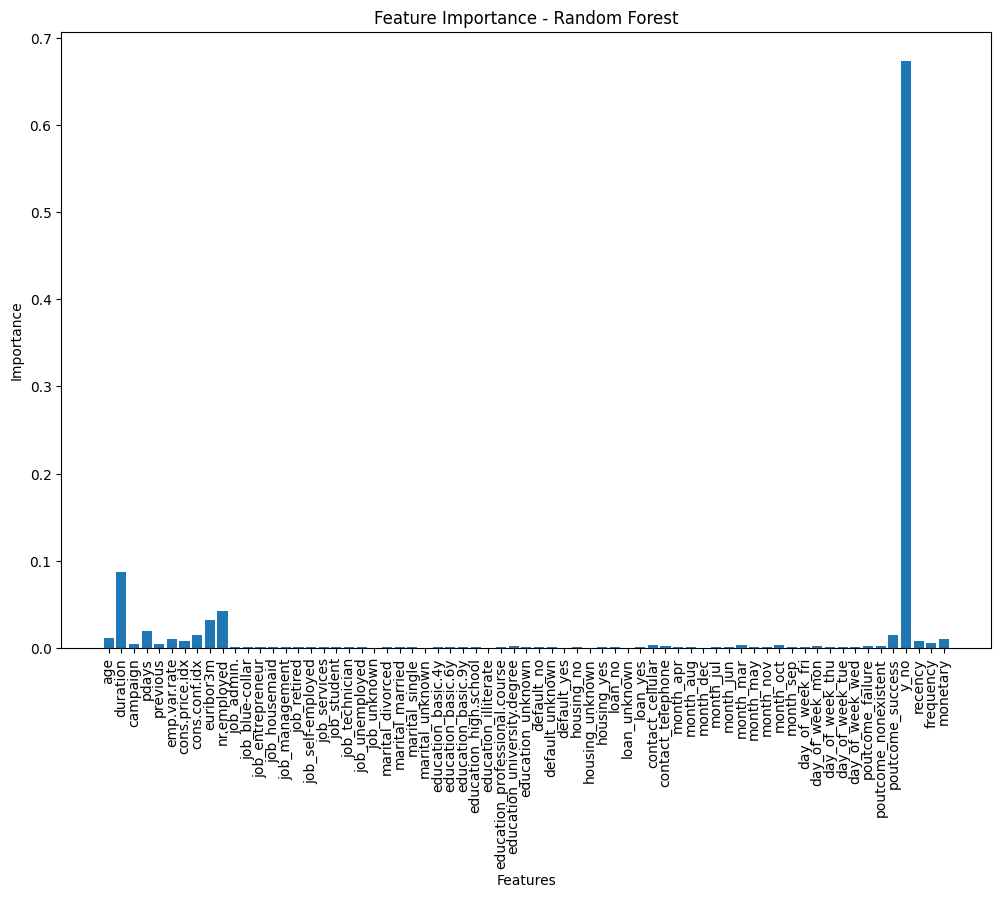

<Figure size 640x480 with 0 Axes>

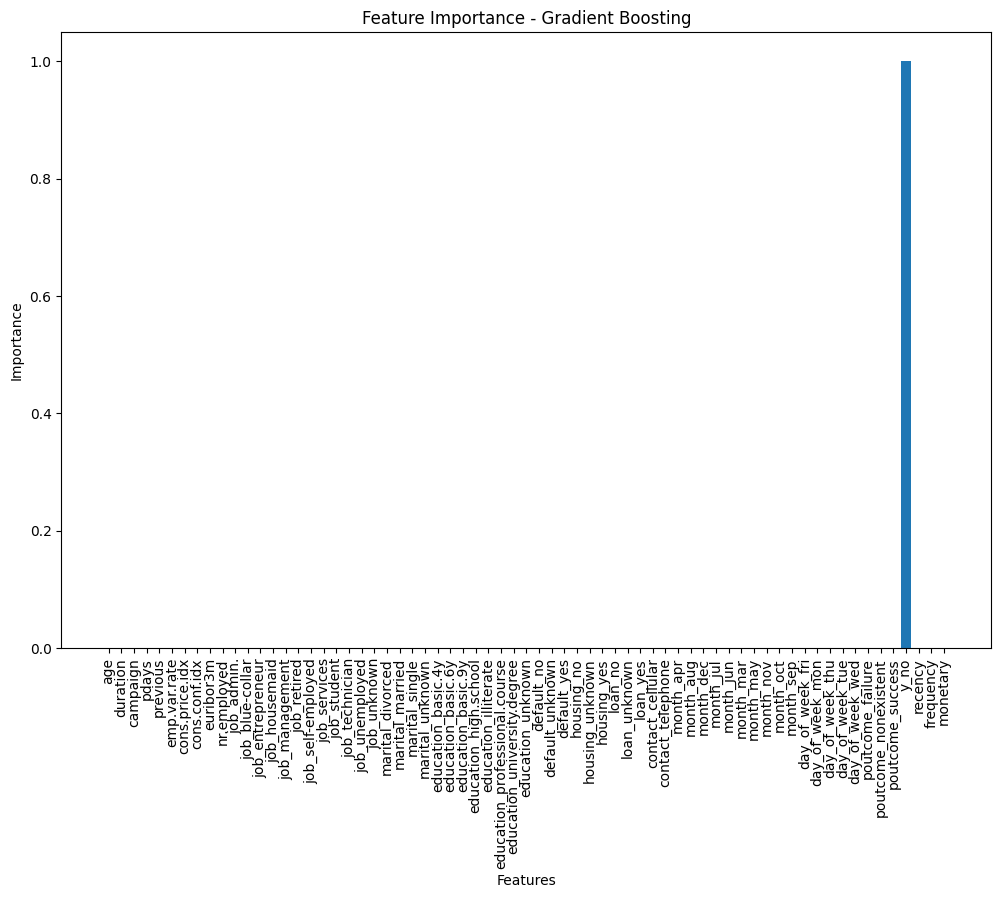

<Figure size 640x480 with 0 Axes>

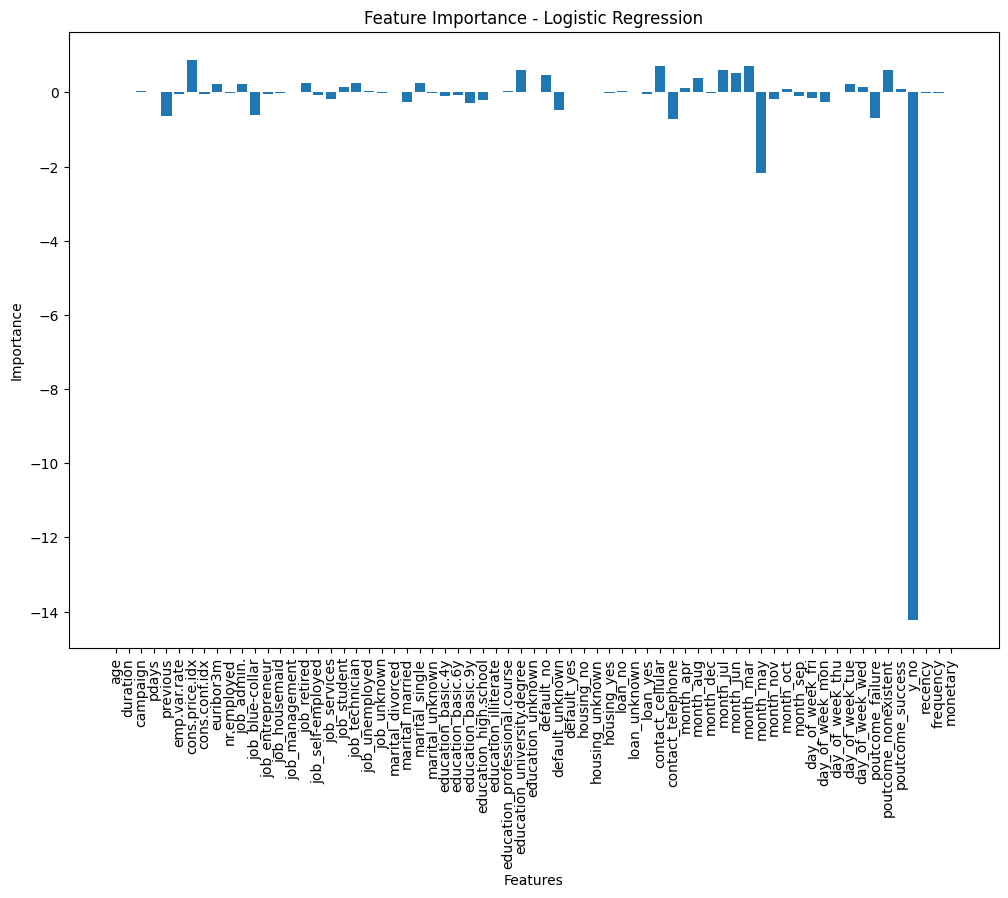

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(X.columns, rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=90)
plt.show()

# plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(X.columns, gb.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.xticks(rotation=90)
plt.show()


# plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(X.columns, logreg.coef_[0])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Logistic Regression')
plt.xticks(rotation=90)
plt.show()



## 6. Hyperparameter Tuning
Objective: Fine-tune hyperparameters of the top-performing models using techniques like Grid Search and Random Search.



In [28]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best AUC-ROC for Random Forest:", grid_rf.best_score_)



Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best AUC-ROC for Random Forest: 1.0


In [30]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best AUC-ROC for Gradient Boosting:", grid_gb.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best AUC-ROC for Gradient Boosting: 1.0


## Model Interpretation
Use SHAP values and other interpretability techniques to understand model predictions and identify the most influential features.

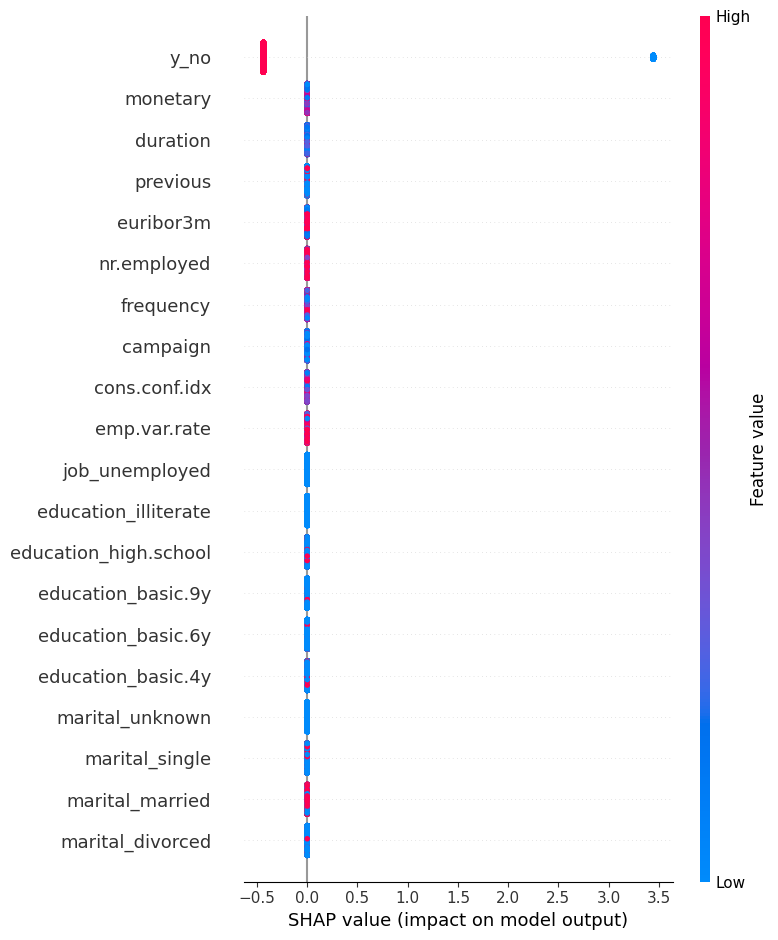

In [33]:
import shap

# Initialize SHAP explainer for the best model (assuming Gradient Boosting is the best)
explainer = shap.Explainer(grid_gb.best_estimator_)
shap_values = explainer(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)



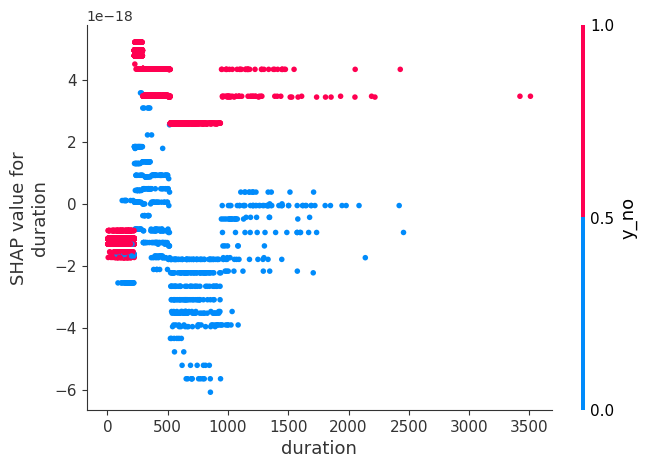

In [35]:
# Dependence plot for a specific feature
shap.dependence_plot('duration', shap_values.values, X_test)


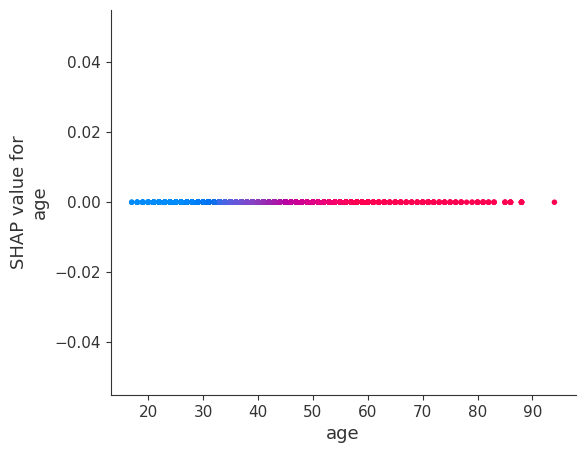

In [36]:
# Dependence plot for a specific feature
shap.dependence_plot('age', shap_values.values, X_test)
plt.show()

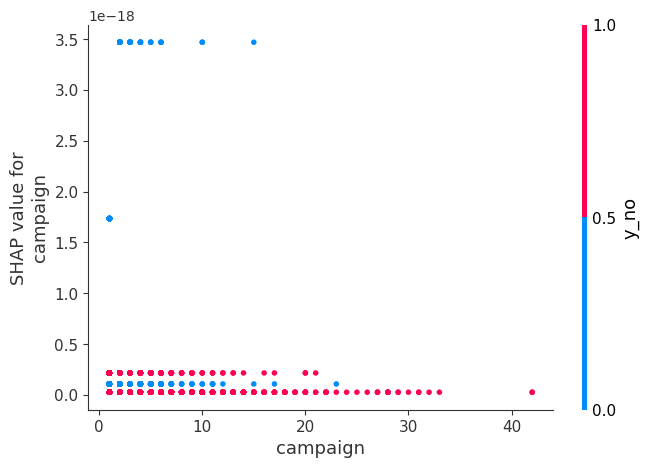

In [43]:
# Dependence plot for a specific feature
shap.dependence_plot('campaign', shap_values.values, X_test)
plt.show()


In [44]:
# save the model 
import joblib

# Save the best model
joblib.dump(grid_gb.best_estimator_, 'best_model.pkl')



['best_model.pkl']

In [45]:
# Load the model
loaded_model = joblib.load('best_model.pkl')

# Make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Model evaluation
print("Loaded Model:\n", classification_report(y_test, y_pred_loaded))



Loaded Model:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7303
         1.0       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238

